In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dataset = pd.read_excel("EncodedData.xlsx")
#print(dataset.head)
dataset.dropna(inplace=True)
dataset.drop(columns=['Unnamed: 0'],inplace=True)
print(dataset.shape)

FileNotFoundError: ignored

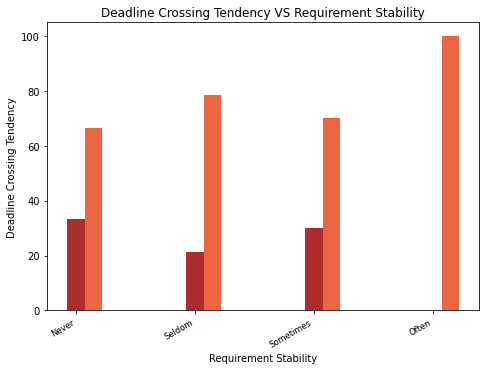

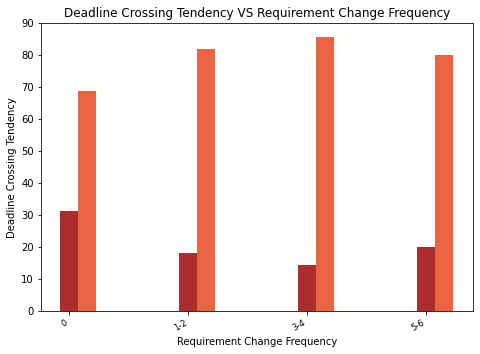

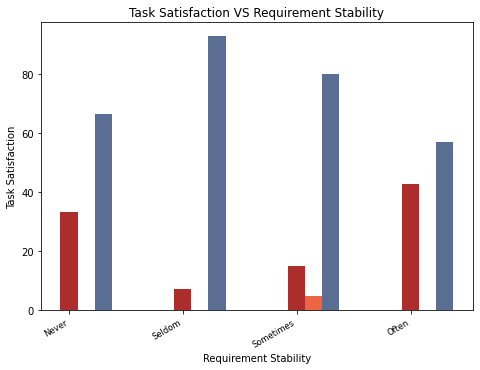

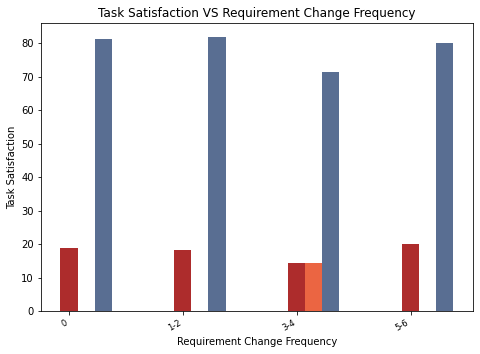

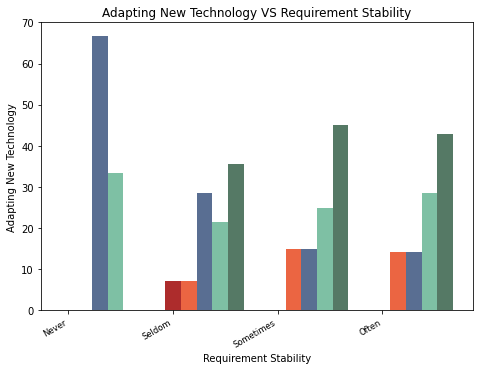

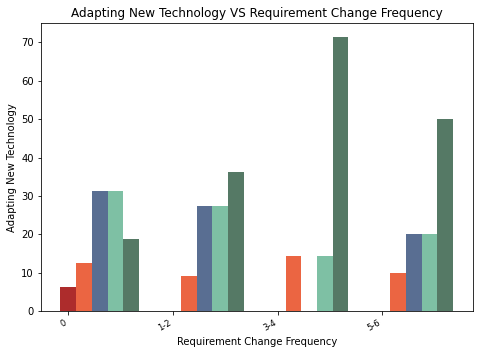

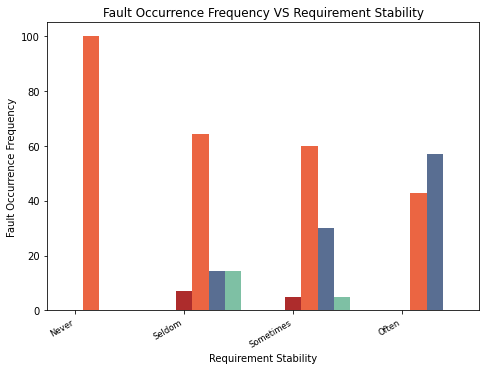

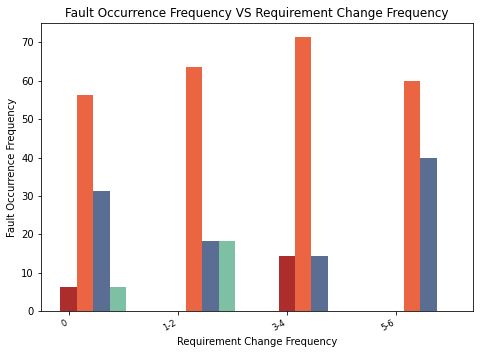

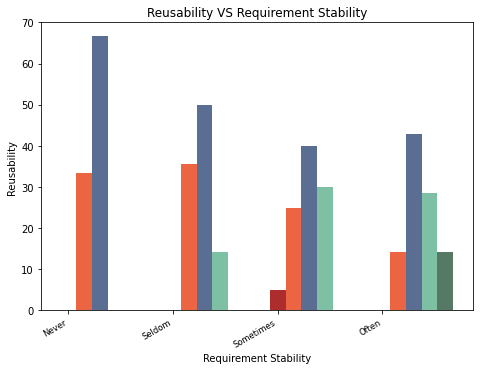

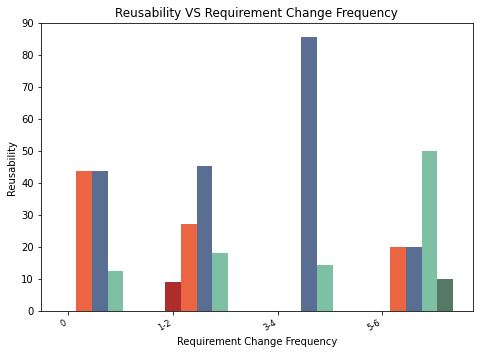

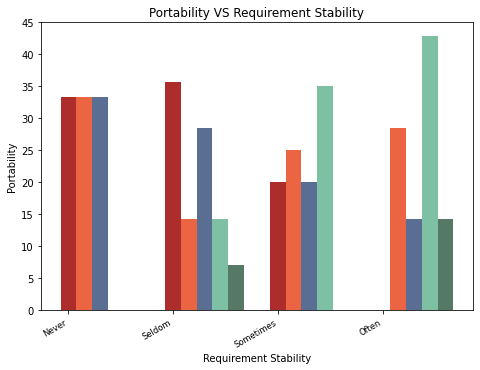

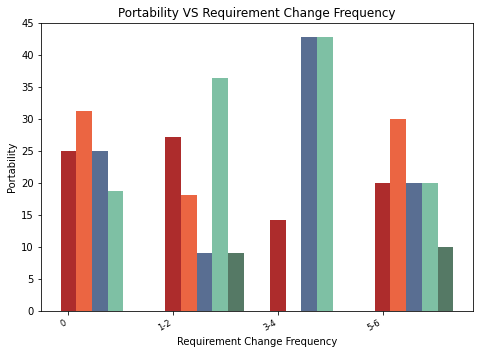

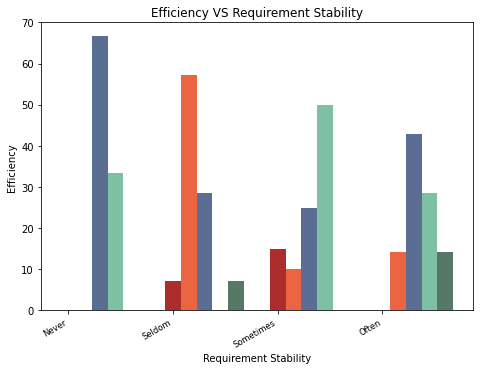

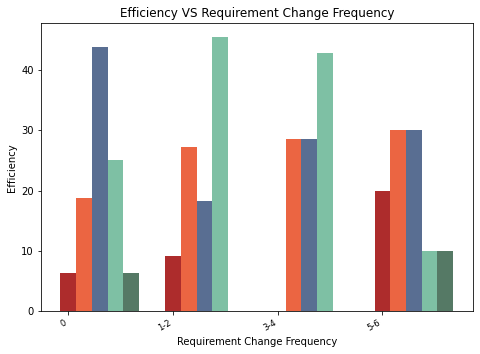

In [ ]:
independent_var=[
    {'name': 'Requirement Stability', 'encoding': dict((v,k) for k,v in {'Never': 1, 'Seldom': 2, 
                                                                   'Sometimes':3, 'Often':4, 
                                                                   'Always':5}.items())},
    {'name': 'Requirement Change Frequency', 'encoding': dict((v,k) for k,v in {'0': 1, '1-2': 2, 
                                                                   '3-4':3, '5-6':4, 
                                                                   'More than 6':5}.items())},

]
effect_list=[
'Reusability',
'Portability',
'Efficiency',
'Deadline Crossing Tendency',
'Task Satisfaction',
'Adapting New Technology',
'Fault Occurrence Frequency'
]
effect_name='Task Satisfaction'

for effect_name in effect_list:
  
    effect_type = sorted(dataset[effect_name].unique())

    for x in independent_var:
        data = []
        bar_col = x['name']
        barcol_unique = sorted(dataset[bar_col].unique())

        for prod_type in effect_type:
            bar_data = []
            for bar in barcol_unique:
                a = dataset[dataset[bar_col] == bar]
                query_result = a[a[effect_name] == prod_type]

                bar_data.append((query_result.shape[0]/a.shape[0]) * 100.0)
            data.append(bar_data)
            
        X = np.arange(dataset[bar_col].nunique())
        fig = plt.figure()
        ax = fig.add_axes([0,0,1,1])

        plt.xticks(range(len(barcol_unique)), x['encoding'].values() if len(x['encoding'].keys()) > 0 else range(len(barcol_unique)), size='small')
        plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

        colorlist = ['#ad2c2c', '#eb6542', '#596e92', '#7ec0a4', '#557965', '#559e65']
        wid=0.15

        bar_list = []
    
        for i in range(len(data)):
            bar_list.append(ax.bar(X + wid*i, data[i], color = colorlist[i], width = wid))

        for bar in bar_list:
            for rect in bar:
                height = rect.get_height()

        plt.xlabel(x['name'])
        plt.ylabel(effect_name)
        plt.title(effect_name +" VS "+str(x['name']))


